<a href="https://colab.research.google.com/github/Nadaramadan1/Elevvo-internship-projects/blob/main/forest_covertype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zsinghrahulk/covertype-forest-cover-types")

print("Path to dataset files:", path)

100%|██████████| 11.2M/11.2M [00:00<00:00, 89.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zsinghrahulk/covertype-forest-cover-types/versions/1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os

# List files in the downloaded directory
files = os.listdir(path)
print("Files in the downloaded directory:", files)

# Assuming the CSV file is named 'covertype.csv', adjust if necessary
csv_file_path = os.path.join(path, 'covertype.csv')

# Check if the file exists before reading
if os.path.exists(csv_file_path):
    data = pd.read_csv(csv_file_path)
    display(data.head())
else:
    print(f"Error: The file '{csv_file_path}' was not found in the directory.")

Files in the downloaded directory: ['covertype.csv']


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Unnamed: 0                          581012 non-null  int64
 1   Unnamed: 1                          581012 non-null  int64
 2   Unnamed: 2                          581012 non-null  int64
 3   Elevation                           581012 non-null  int64
 4   Aspect                              581012 non-null  int64
 5   Slope                               581012 non-null  int64
 6   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 7   Vertical_Distance_To_Hydrology      581012 non-null  int64
 8   Horizontal_Distance_To_Roadways     581012 non-null  int64
 9   Hillshade_9am                       581012 non-null  int64
 10  Hillshade_Noon                      581012 non-null  int64
 11  Hillshade_3pm                       581012 non-null 

In [ ]:
X = data.drop(columns=['Cover_Type', 'Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])
y = data['Cover_Type']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X_scaled)

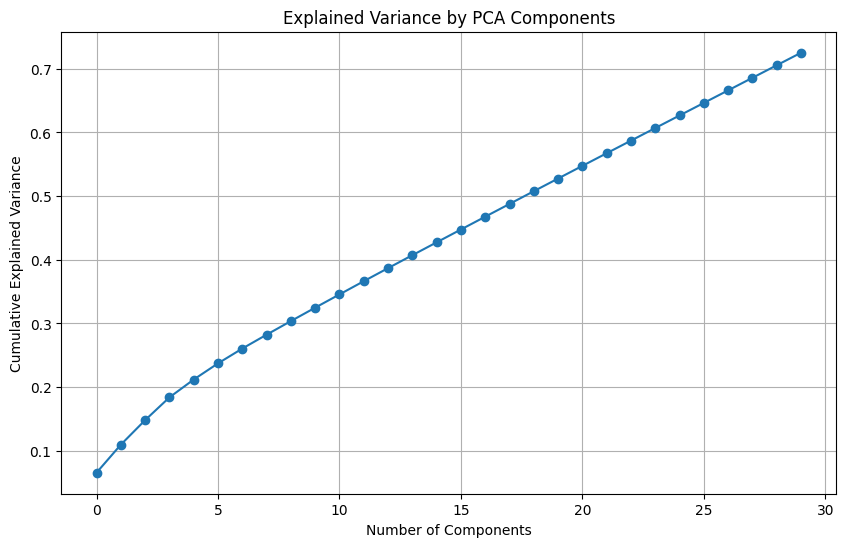

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective='multi:softmax', num_class=7)
xgb.fit(X_train, y_train - 1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=7, ...)

In [ ]:
from sklearn.metrics import accuracy_score
print("RF Accuracy:", accuracy_score(y_test, rf.predict(X_test)))
print("XGB Accuracy:", accuracy_score(y_test, xgb.predict(X_test)))


RF Accuracy: 0.9320929752243918
XGB Accuracy: 0.08983416951369586


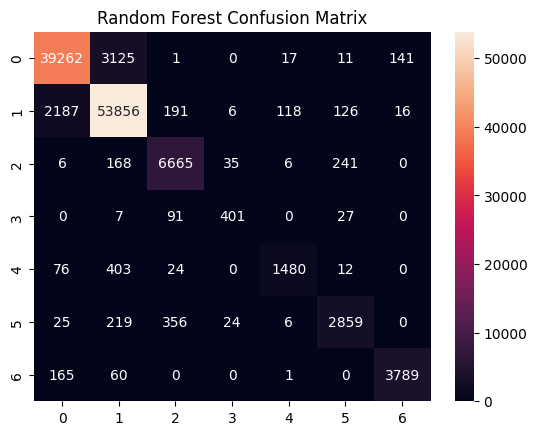

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()


<Axes: title={'center': 'Feature Importance - Random Forest'}>

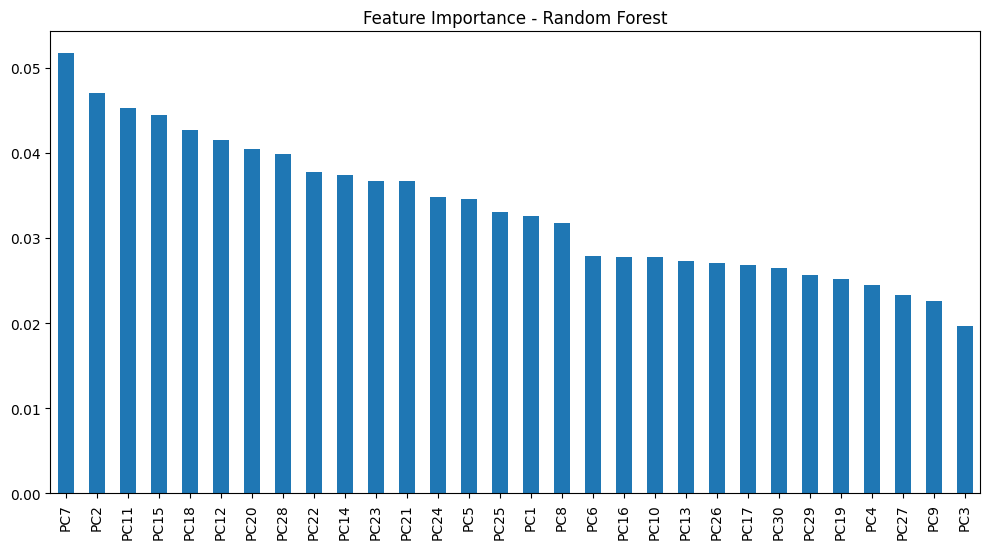

In [ ]:
importances = rf.feature_importances_
# Use the feature names of the PCA components
feat_names = [f'PC{i+1}' for i in range(X_pca.shape[1])]
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(12,6), title="Feature Importance - Random Forest")